# Understanding User Adoption Trends

The goal of this project is investigate what types of factors are help predict user adoption for Relax's software product. User adoption is defined as a user who as logged into the product on three seperate days in at least one seven-day period, and we are give all user login timestamps, as well as a some quantities that Relax records about their users to investigate.

## Exploratory Data Analysis

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('takehome_users.csv', encoding='cp1252', parse_dates=['creation_time'])

In [3]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
df_logins = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])

In [6]:
df_logins.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


### Labeling Data

A user is considered to be labeled as adopted if the user with the specifc user id has logged into the product on three seperate days in at least one seven-day period. Adopted users have have a value of 1 for the variable  "adopted_user" and 0 otherwise.

In [8]:
def label_user(user_logins):
    
    label = 0
    
    for login_ts in user_logins:
        cutoff_ts = login_ts + pd.DateOffset(days=7)
        week_slice = user_logins[(login_ts <= user_logins) & (user_logins <= cutoff_ts)]
        # Dropping duplicate days
        week_slice = week_slice.dt.date.drop_duplicates()
        if 3 <= week_slice.count():
            label = 1
            break
            
    return label

def label_df(df, df_logins):
    
    df_labeled = df.copy(deep=True)
    
    def label_user_id(user_id):
        user_logins = df_logins[df_logins.user_id == user_id].time_stamp
        return label_user(user_logins)
    
    df_labeled['adopted_user'] = df['object_id'].map(label_user_id)
    
    return df_labeled

In [9]:
df = label_df(df, df_logins)

### Analysis

Plotting sampling distribution for Adopted User

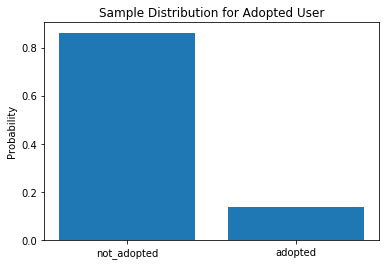

Number of Users Adopted: 1656
Probability of Adopting a User: 0.138
Number of Users Not Adopted: 10344
Probability of Not Adopting a User: 0.862


In [10]:
counts = df['adopted_user'].value_counts()
distr = df['adopted_user'].value_counts(normalize=True)

fig, ax = plt.subplots()
ax.bar(distr.index.map(lambda l: 'adopted' if l == 1 else 'not_adopted'), distr)
ax.set_title('Sample Distribution for Adopted User')
ax.set_ylabel('Probability')
plt.show()

print('Number of Users Adopted: {}'.format(counts[1]))
print('Probability of Adopting a User: {}'.format(distr[1]))
print('Number of Users Not Adopted: {}'.format(counts[0]))
print('Probability of Not Adopting a User: {}'.format(distr[0]))

Exploring time like variables.

In [11]:
print('Number of unique end session times: {}'.format(len(df.last_session_creation_time.unique())))
print()
print('Value Counts:')
print(df.last_session_creation_time.value_counts())

Number of unique end session times: 8822

Value Counts:
1.401917e+09    2
1.401868e+09    2
1.354310e+09    1
1.380393e+09    1
1.354303e+09    1
               ..
1.365709e+09    1
1.399264e+09    1
1.399266e+09    1
1.399271e+09    1
1.393658e+09    1
Name: last_session_creation_time, Length: 8821, dtype: int64


In [12]:
print('Number of unique account start dates: {}'.format(len(df.creation_time.unique())))
print()
print('Value Counts:')
print(df.creation_time.value_counts())

Number of unique account start dates: 11996

Value Counts:
2014-02-11 17:57:53    2
2012-09-14 21:35:03    2
2012-09-01 07:22:09    2
2013-05-25 04:35:52    2
2013-09-13 08:15:45    1
                      ..
2014-03-16 13:52:40    1
2013-10-01 17:38:38    1
2013-06-08 20:18:35    1
2013-04-11 00:02:39    1
2013-06-25 00:29:04    1
Name: creation_time, Length: 11996, dtype: int64


In [13]:
print('Value Counts for start date months:')
print(df.creation_time.dt.month.value_counts())

Value Counts for start date months:
5     1455
3     1177
4     1169
1     1029
11     936
2      934
12     930
10     924
9      901
7      852
8      852
6      841
Name: creation_time, dtype: int64


Plotting sampling distributions for Adopted Users given a specific starting month.

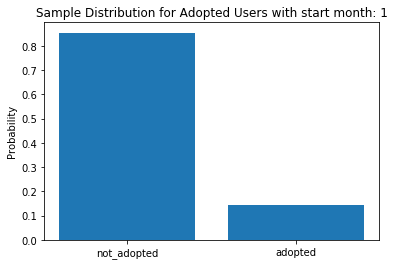

Number of Users Adopted: 150
Probability of Adopting a User: 0.1457725947521866
Number of Users Not Adopted: 879
Probability of Not Adopting a User: 0.8542274052478134


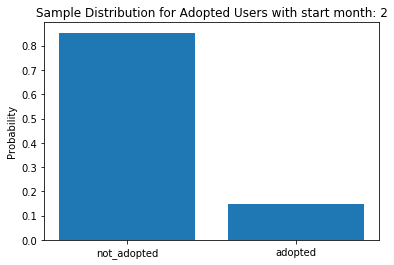

Number of Users Adopted: 137
Probability of Adopting a User: 0.14668094218415417
Number of Users Not Adopted: 797
Probability of Not Adopting a User: 0.8533190578158458


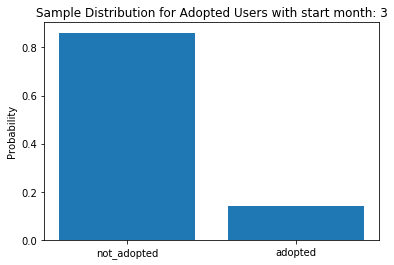

Number of Users Adopted: 164
Probability of Adopting a User: 0.1393372982158029
Number of Users Not Adopted: 1013
Probability of Not Adopting a User: 0.8606627017841971


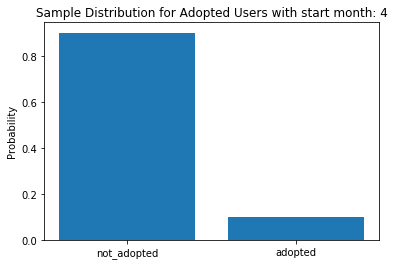

Number of Users Adopted: 115
Probability of Adopting a User: 0.09837467921300257
Number of Users Not Adopted: 1054
Probability of Not Adopting a User: 0.9016253207869974


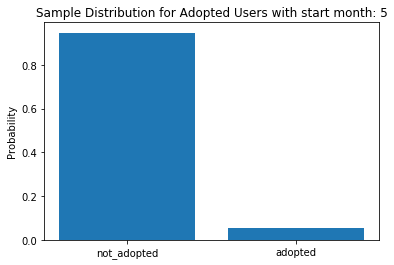

Number of Users Adopted: 78
Probability of Adopting a User: 0.05360824742268041
Number of Users Not Adopted: 1377
Probability of Not Adopting a User: 0.9463917525773196


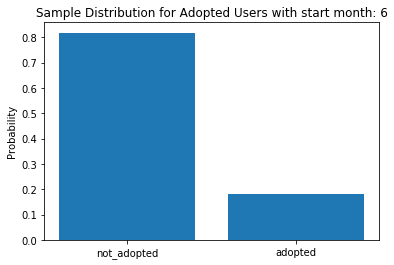

Number of Users Adopted: 153
Probability of Adopting a User: 0.18192627824019025
Number of Users Not Adopted: 688
Probability of Not Adopting a User: 0.8180737217598097


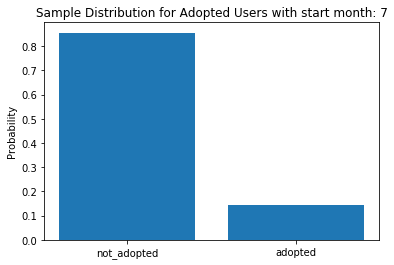

Number of Users Adopted: 123
Probability of Adopting a User: 0.1443661971830986
Number of Users Not Adopted: 729
Probability of Not Adopting a User: 0.8556338028169014


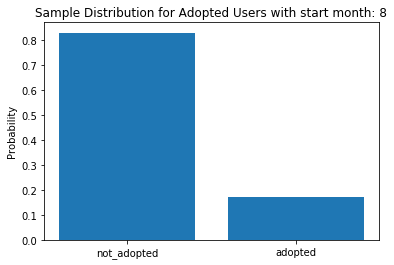

Number of Users Adopted: 145
Probability of Adopting a User: 0.17018779342723006
Number of Users Not Adopted: 707
Probability of Not Adopting a User: 0.82981220657277


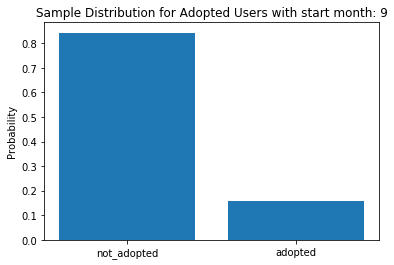

Number of Users Adopted: 142
Probability of Adopting a User: 0.15760266370699222
Number of Users Not Adopted: 759
Probability of Not Adopting a User: 0.8423973362930077


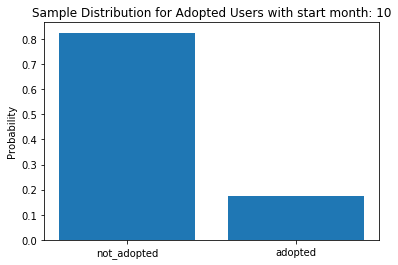

Number of Users Adopted: 162
Probability of Adopting a User: 0.17532467532467533
Number of Users Not Adopted: 762
Probability of Not Adopting a User: 0.8246753246753247


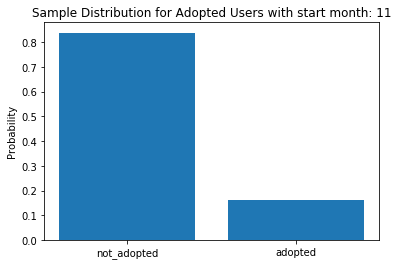

Number of Users Adopted: 151
Probability of Adopting a User: 0.16132478632478633
Number of Users Not Adopted: 785
Probability of Not Adopting a User: 0.8386752136752137


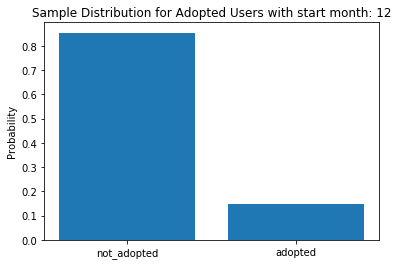

Number of Users Adopted: 136
Probability of Adopting a User: 0.14623655913978495
Number of Users Not Adopted: 794
Probability of Not Adopting a User: 0.853763440860215


In [14]:
for i in df.creation_time.dt.month.sort_values().unique():
    counts = df[df.creation_time.dt.month == i]['adopted_user'].value_counts()
    distr = df[df.creation_time.dt.month == i]['adopted_user'].value_counts(normalize=True)

    fig, ax = plt.subplots()
    ax.bar(distr.index.map(lambda l: 'adopted' if l == 1 else 'not_adopted'), distr)
    ax.set_title('Sample Distribution for Adopted Users with start month: {}'.format(i))
    ax.set_ylabel('Probability')
    plt.show()

    print('Number of Users Adopted: {}'.format(counts[1]))
    print('Probability of Adopting a User: {}'.format(distr[1]))
    print('Number of Users Not Adopted: {}'.format(counts[0]))
    print('Probability of Not Adopting a User: {}'.format(distr[0]))

It appears there is some seasonal variance of the Adopted User distribution throughout the months.

Exploring email variable.

In [15]:
emails = df.email.map(lambda email: email.split('@', 1)[1])
print('Number of unique emails: {}'.format(len(emails.unique())))
print()
print('Value Counts:')
print(emails.value_counts())

Number of unique emails: 1184

Value Counts:
gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
yeyhm.com            1
mrxqj.com            1
skuvv.com            1
swhrr.com            1
fwtem.com            1
Name: email, Length: 1184, dtype: int64


In [16]:
print('Number of unique emails with more than 1000 samples: {}'.format(emails.value_counts()[(emails.value_counts() >= 1000)].count()))
print()
print('Value Counts for emails with more than 1000 samples:')
print(emails.value_counts()[(emails.value_counts() > 1000)])

Number of unique emails with more than 1000 samples: 6

Value Counts for emails with more than 1000 samples:
gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
Name: email, dtype: int64


In [17]:
print('Number of unique emails with more than 1000 samples: {}'.format(emails.value_counts()[(emails.value_counts() < 1000)].count()))
print()
print('Value Counts for emails with more than 1000 samples:')
print(emails.value_counts()[(emails.value_counts() < 1000)])

Number of unique emails with more than 1000 samples: 1178

Value Counts for emails with more than 1000 samples:
dqwln.com    2
oqpze.com    2
qgjbc.com    2
mumdc.com    2
xybhi.com    2
            ..
yeyhm.com    1
mrxqj.com    1
skuvv.com    1
swhrr.com    1
fwtem.com    1
Name: email, Length: 1178, dtype: int64


It appears most of the users belong to the big 6 emails: gmail.com, yahoo.com, jourrapide.com, cuvox.com, gustr.com, and hotmail, and any email outside the big six either contains 2 users or 1 user which is not enough samples to generate a faithful representation of our Adopted User Distribution.

Plotting sampling distributions for Adopted Users across the big six emails: gmail.com, yahoo.com, jourrapide.com, cuvox.com, gustr.com, and hotmail.com.

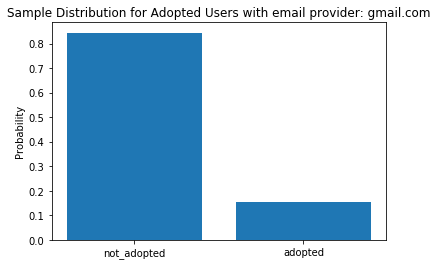

Number of Users Adopted: 557
Probability of Adopting a User: 0.15637282425603594
Number of Users Not Adopted: 3005
Probability of Not Adopting a User: 0.8436271757439641


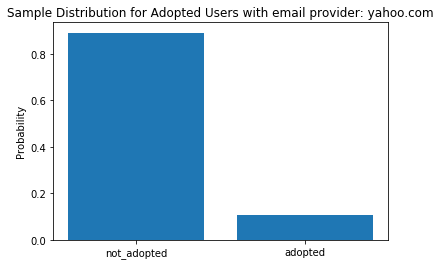

Number of Users Adopted: 267
Probability of Adopting a User: 0.10911319983653453
Number of Users Not Adopted: 2180
Probability of Not Adopting a User: 0.8908868001634654


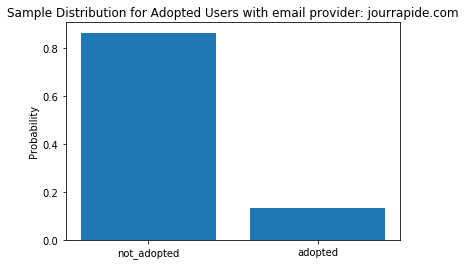

Number of Users Adopted: 170
Probability of Adopting a User: 0.13502779984114377
Number of Users Not Adopted: 1089
Probability of Not Adopting a User: 0.8649722001588562


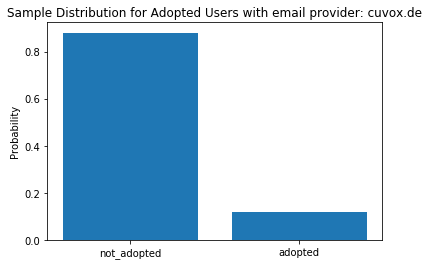

Number of Users Adopted: 144
Probability of Adopting a User: 0.11980033277870217
Number of Users Not Adopted: 1058
Probability of Not Adopting a User: 0.8801996672212978


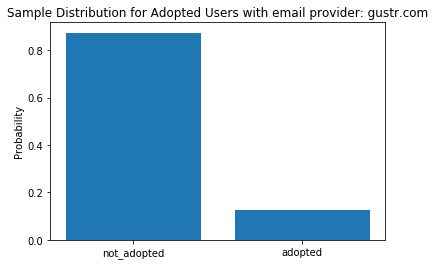

Number of Users Adopted: 150
Probability of Adopting a User: 0.1272264631043257
Number of Users Not Adopted: 1029
Probability of Not Adopting a User: 0.8727735368956743


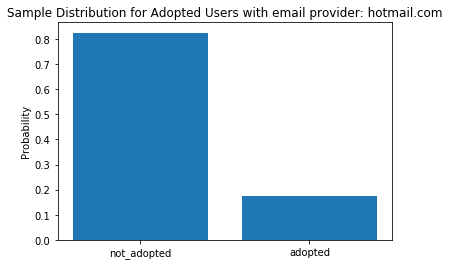

Number of Users Adopted: 205
Probability of Adopting a User: 0.1759656652360515
Number of Users Not Adopted: 960
Probability of Not Adopting a User: 0.8240343347639485


In [18]:
for i in emails.value_counts()[(emails.value_counts() > 100)].index:
    counts = df[emails == i]['adopted_user'].value_counts()
    distr = df[emails == i]['adopted_user'].value_counts(normalize=True)

    fig, ax = plt.subplots()
    ax.bar(distr.index.map(lambda l: 'adopted' if l == 1 else 'not_adopted'), distr)
    ax.set_title('Sample Distribution for Adopted Users with email provider: {}'.format(i))
    ax.set_ylabel('Probability')
    plt.show()

    print('Number of Users Adopted: {}'.format(counts[1]))
    print('Probability of Adopting a User: {}'.format(distr[1]))
    print('Number of Users Not Adopted: {}'.format(counts[0]))
    print('Probability of Not Adopting a User: {}'.format(distr[0]))

Plotting the sampling distribution for Adopted Users which do not belong to the big six email providers.

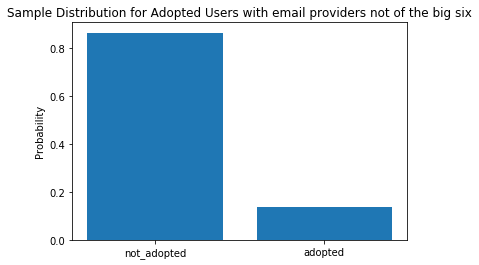

Number of Users Adopted: 163
Probability of Adopting a User: 0.13743676222596965
Number of Users Not Adopted: 1023
Probability of Not Adopting a User: 0.8625632377740303


In [19]:
idxs = (emails != 'gmail.com') & (emails != 'yahoo.com') & (emails != 'jourrapide.com') & (emails != 'cuvox.de') & (emails != 'gustr.com') & (emails != 'hotmail.com')
counts = df[idxs]['adopted_user'].value_counts()
distr = df[idxs]['adopted_user'].value_counts(normalize=True)

fig, ax = plt.subplots()
ax.bar(distr.index.map(lambda l: 'adopted' if l == 1 else 'not_adopted'), distr)
ax.set_title('Sample Distribution for Adopted Users with email providers not of the big six')
ax.set_ylabel('Probability')
plt.show()

print('Number of Users Adopted: {}'.format(counts[1]))
print('Probability of Adopting a User: {}'.format(distr[1]))
print('Number of Users Not Adopted: {}'.format(counts[0]))
print('Probability of Not Adopting a User: {}'.format(distr[0]))

Plotting the sampling distribution for Adopted Users which do belong to the big six email providers.

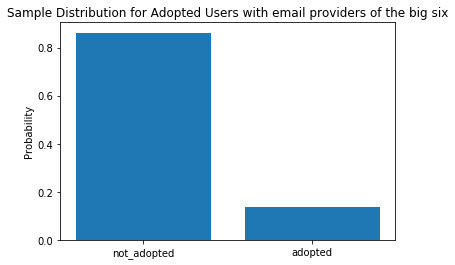

Number of Users Adopted: 1493
Probability of Adopting a User: 0.13806177177732568
Number of Users Not Adopted: 9321
Probability of Not Adopting a User: 0.8619382282226743


In [20]:
idxs = ~((emails != 'gmail.com') & (emails != 'yahoo.com') & (emails != 'jourrapide.com') & (emails != 'cuvox.de') & (emails != 'gustr.com') & (emails != 'hotmail.com'))
counts = df[idxs]['adopted_user'].value_counts()
distr = df[idxs]['adopted_user'].value_counts(normalize=True)

fig, ax = plt.subplots()
ax.bar(distr.index.map(lambda l: 'adopted' if l == 1 else 'not_adopted'), distr)
ax.set_title('Sample Distribution for Adopted Users with email providers of the big six')
ax.set_ylabel('Probability')
plt.show()

print('Number of Users Adopted: {}'.format(counts[1]))
print('Probability of Adopting a User: {}'.format(distr[1]))
print('Number of Users Not Adopted: {}'.format(counts[0]))
print('Probability of Not Adopting a User: {}'.format(distr[0]))

From the above plots it appears the distribution for adopted users does not change much if at all, when varying if the users belonged to one of the big 6 email providers or not. It also did not seem to change much when varying if the users belonged to any of the big 6 email providers. This implies that the email provider does not seem to effect if a user is adopted or not.

Exploring the invited by user id variable.

In [21]:
print('Number of unique users who invited other users: {}'.format(len(df.invited_by_user_id.unique())))
print()
print('Value Counts:')
print(df.invited_by_user_id.value_counts())

Number of unique users who invited other users: 2565

Value Counts:
10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64


It appears no one user has invited enough users to generate a sample size that is big enough to faithfully represent the Adopted User Distribution. Therefore if we continue our investigation, into whether if being invited by **a specific user** seems to effect Adoption status or not, our conclusions will be dubious at best.

In [22]:
users_invited = df.invited_by_user_id.astype('Int64').fillna(0).map(lambda x: 1 if x > 0 else 0)
print('Value Counts for Users Invited:')
print(users_invited.value_counts())

Value Counts for Users Invited:
1    6417
0    5583
Name: invited_by_user_id, dtype: int64


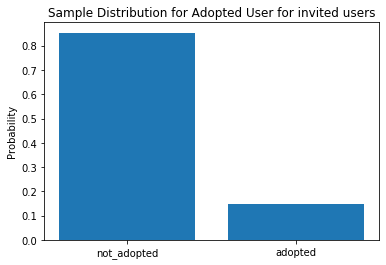

Number of Users Adopted: 943
Probability of Adopting a User: 0.14695340501792115
Number of Users Not Adopted: 5474
Probability of Not Adopting a User: 0.8530465949820788


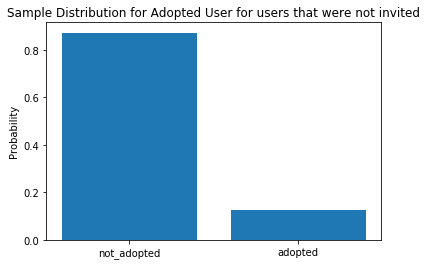

Number of Users Adopted: 713
Probability of Adopting a User: 0.1277091169622067
Number of Users Not Adopted: 4870
Probability of Not Adopting a User: 0.8722908830377933


In [23]:
for i in users_invited.unique():
    counts = df[users_invited == i]['adopted_user'].value_counts()
    distr = df[users_invited == i]['adopted_user'].value_counts(normalize=True)

    fig, ax = plt.subplots()
    ax.bar(distr.index.map(lambda l: 'adopted' if l == 1 else 'not_adopted'), distr)
    if i == 1:
        ax.set_title('Sample Distribution for Adopted User for invited users')
    else: 
        ax.set_title('Sample Distribution for Adopted User for users that were not invited')
    ax.set_ylabel('Probability')
    plt.show()

    print('Number of Users Adopted: {}'.format(counts[1]))
    print('Probability of Adopting a User: {}'.format(distr[1]))
    print('Number of Users Not Adopted: {}'.format(counts[0]))
    print('Probability of Not Adopting a User: {}'.format(distr[0]))

Although we have not determined whether being invited by **a specific user** effects the probabilities of being an adopted user or not, we can determine whether being invited by **a user** effects the probability distribution of Adopted status. It appears from the above plots that varying the invited status seems to slightly effect the distribution of Adopted status.

Investigating organization id variable.

In [24]:
print('Number of unique organizations: {}'.format(len(df.org_id.unique())))
print()
print('Value Counts:')
print(df.org_id.value_counts())

Number of unique organizations: 417

Value Counts:
0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64


Most of the unique organizations do not contain enough user samples to faithfully represent the Adopted status distribution, also there appears to be alot unique of classes to one hot encode. 

#### Conclusions:

The approach to this analysis was to first investigate the generally distribution of our target variable, then investigate all the variables that will most likely be dropped from further analysis based on either not containing enough samples, the specific format of the variable, etcetera. We attempt to show if any of these variables could still provide some valuable information to be included in the model. 

Firstly, we checked the distribution of adopted user status. From the distribution of adopted user status we can tell that our dataset is unbalanced with the minority class being adopted. This implies that the metrics that will be the most useful in measuring the success of a model design to give us a better understanding of the factors that predict user adoption would probably be Precision and Recall of the minority class. 

Secondly we investigated the temporal variables of our dataset, creation date, the date the user created their account, and last session creation time, the timestamp of the users most recent usage. Since the creation date's and the last session creation time's most populous class contains only two users (with most classes containing only one user), there can be no way that we can correlate these variables with our target variable adopted status because each class contains too few samples. Also, it doesn't make sense that the exact date a user makes an account should have any bearing over whether they use the account 3 or more times in some future week. Likewise, the same applies with the variable last session creation time. If what drives adoption status is some sort of seasonal phenomena then the month attribute of creation date could still have some use. In order to check this we plotted the distributions for adopted status while varying account creation month. From these plots, it appears that there could be a correlation between the month the account is created in and the future adoption status of the user. Thus from this analysis, I feel we are safe to drop variables creation date, and last session creation time from further analysis, and create a new variable to represent the month the users account was created in. 

Thirdly, we explored the email variable of our users. We found that most of our users belonged to six email providers: gmail.com, yahoo.com, jourrapide.com, cuvox.de, gustr.com, and hotmail.com, with the rest of the users being evenly distributed across many less popular email service providers, most containing only one or two users. From this initial analysis, it is easy to dismiss the email variable because it contains too many unique classes to one hot encode. To alleviate this we tried two partitioning schemes: 1) splitting the email variable into 7 partitions for each one of the big six email providers plus not belonging to one of the big six, and 2) splitting the email variable into 2 partitions one for belonging to a big six email provider and another for not. When varying through both partitioning schemes it became apparent that the distribution for Adopted status did not change much at all, thus I feel we are safe to assume that the email variable does not contribute much to adopted user status and can be dropped from further analysis.

Fourthly we investigated the invited by user id variable. None of the unique classes (user id's that invited other current users) contained enough samples to faithfully represent the adopted users distribution, as well as there being too many unique classes to one hot encode. In order to fix these issues we converted the variable into a binary one that represented if the user was invited to the service by any other previous user or not. When plotting the distribution of Adopted status across this new variable it was clear that this variable had a small effect in changing the distribution. Although the effect of this new variable is small we think it will still be useful to include in further analysis because it would be interesting to see the specific effect it has on the target variable if any at all. From this investigation we can conclude that although the invited by user id variable is not fit for further analysis, the new variable, invited by a user, will be interesting to include in further analysis.

Finally we checked the org id variable. There appeared to be alot of unique classes a few of which contianed a small amount of samples. Although the above reasons are strong enough to not include this variable in further analysis, it still is an interesting question to ask: whether a specific organization correlates more with adopted users. Thus I feel there is reason enough to include this variable in the modeling phase.

From the above analysis we can conclude that variables that will be used as features in our modeling phase will be: the month the user created their account, creation source, opted in to mailing list, enabled for marketing drip, org id, and if they were invited by a user. 

### Preprocessing Data

To preprocess the data we will first create new variables creation month to represent the month the user created their account, and invited to represent if they were invited by another user or not. Since the only NaN values exist in the invited by user id variable, these NaN values will be filled with zeros in the process of creating the invited variable, thus none of our features will contain any missing values to be dealt with. The data we will then be encoded. We will numerically encode the creation month variable, since months are ordinal in nature. We will one hot encode the categorical variables: creation source, and org id, and binary encode the binary variables: opted in to mailing list, enabled for marketing drip, and invited. Finally we will write the dataset to disk.

In [25]:
def preprocess(df):
    df_p = df.copy(deep=True)
    df_p['creation_month'] = df_p.creation_time.dt.month
    df_p['invited'] = df_p.invited_by_user_id.astype('Int64').fillna(0).map(lambda x: 1 if x > 0 else 0)
    one_hot_creation_source = pd.get_dummies(df_p['creation_source'], prefix='cs', drop_first=True)
    df_p = pd.concat([df_p, one_hot_creation_source], axis=1)
    one_hot_org_id = pd.get_dummies(df_p['org_id'], prefix='org_id', drop_first=True)
    df_p = pd.concat([df_p, one_hot_org_id], axis=1)
    df_p = df_p.drop(columns=['object_id', 'creation_time', 'name', 'email',
                              'creation_source', 'last_session_creation_time',
                              'org_id', 'invited_by_user_id'])
    label_name = 'adopted_user'
    labels = df_p[label_name].values
    df_features = df_p.drop(columns=['adopted_user'])
    features = df_features.values
    feature_names = list(df_features.columns)
    return features, labels, feature_names, label_name

In [26]:
X, y, feature_names, label_name = preprocess(df)

Writing train and test datasets to disk.

In [27]:
with open('dataset.pickle', 'wb') as f:
    dataset = (X, y, feature_names, label_name)
    pickle.dump(dataset, f)

### Analysis on Preprocessed Data

Plotting sampling distribution for Adopted User

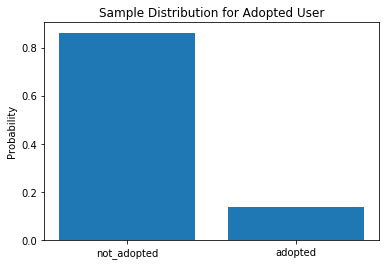

Number of Users Adopted: 1656
Probability of Adopting a User: 0.138
Number of Users Not Adopted: 10344
Probability of Not Adopting a User: 0.862


In [28]:
data = pd.Series(y)
counts = data.value_counts()
distr = data.value_counts(normalize=True)

fig, ax = plt.subplots()
ax.bar(distr.index.map(lambda l: 'adopted' if l == 1 else 'not_adopted'), distr)
ax.set_title('Sample Distribution for Adopted User')
ax.set_ylabel('Probability')
plt.show()

print('Number of Users Adopted: {}'.format(counts[1]))
print('Probability of Adopting a User: {}'.format(distr[1]))
print('Number of Users Not Adopted: {}'.format(counts[0]))
print('Probability of Not Adopting a User: {}'.format(distr[0]))

Our target variable distribution has been unchanged throughout the preprocessing. This is no surprise because we did not drop any samples in our dataset throughout the preprocessing.

## Modeling

After exploring our dataset and selecting the features we will build our models on, we now begin to attempt to model our dataset. Within this section will be multiple subsections one of which will be dedicated to evaluating our baseline model for the dataset, with the others being dedicated to the analysis of alternative models for our dataset. Since the ultimate use of our model is to gain a greater understand of the mechanisms behind the generation of adopted users for Relax's software platform, we require that the models we select to be easily interpretable. Some examples of models that fit this requirement are decision trees and logistic regression models.

### Baseline Model

The baseline model is the bare minimum model we can manually construct from just our Exploratory Data Analysis. This model will give us a baseline that hopefully our trained models will beat. From our exploratory data analysis we have determined the probability of a random user being adopted is about 0.138. From this we can describe our baseline model as a model that predicts a 0.138 chance that the user will be adopted for any user sample that is fed to it.

Thus we can represent our baseline model as: 
$$P(adopted|X)= 0.138$$
for all $X$

In [29]:
import pickle
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Random Seed
seed = 42
# Number of folds to use in k-fold cross-validation
k_folds = 10

In [31]:
with open('dataset.pickle', 'rb') as f:
    X, y, _, _ = pickle.load(f)

In [32]:
def display_results(results, hist_bins=None):
    
    metric_names = [name for name in results.keys() if 'test' in name]
    
    for metric_name in metric_names:
        
        metric_values = results[metric_name]
        name = metric_name.split('test_', 1)[1]
        
        fig, ax = plt.subplots()
        ax.hist(metric_values, bins=hist_bins)
        ax.set_ylabel('Counts')
        ax.set_xlabel(name)
        ax.set_title('Histogram for metric {}'.format(name))
        plt.show()
        
        print('Mean of {}: {}'.format(name, metric_values.mean()))
        print('Variance of {}: {}'.format(name, metric_values.var()))
        print('Standard Deviation of {}: {}'.format(name, metric_values.std()))
        
    return None

Splitting train dataset into train and test datasets.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=seed)
print('Train dataset size: {}'.format(len(y_train)))
print('Test dataset size: {}'.format(len(y_test)))

Train dataset size: 10800
Test dataset size: 1200


Building baseline model.

In [34]:
# Defining Hyperparameters
hyperparameters = {'strategy': 'prior', 'random_state': seed}

# Defining Metrics
def tn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[1, 1]

metrics = {'Accuracy': 'accuracy', 'Precision': 'precision', 'Recall': 'recall',
           'PR_AUC': 'average_precision', 'F1-score': 'f1',
           'TN': sklearn.metrics.make_scorer(tn), 'TP': sklearn.metrics.make_scorer(tp),
           'FN': sklearn.metrics.make_scorer(fn), 'FP': sklearn.metrics.make_scorer(fp)}

In [35]:
baseline_model = DummyClassifier(**hyperparameters)

Training and evaluating model, estimating metrics using k-fold cross-validation.

In [37]:
baseline_cv_results = cross_validate(baseline_model, X_train, y_train, cv=k_folds, scoring=metrics)

/media/Data/Programs/relax_challenge/env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


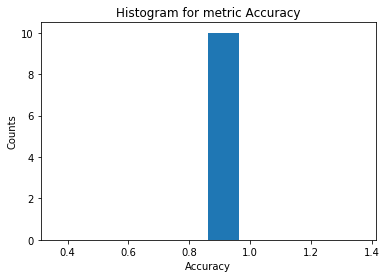

Mean of Accuracy: 0.862037037037037
Variance of Accuracy: 0.0
Standard Deviation of Accuracy: 0.0


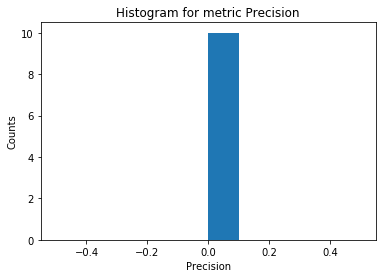

Mean of Precision: 0.0
Variance of Precision: 0.0
Standard Deviation of Precision: 0.0


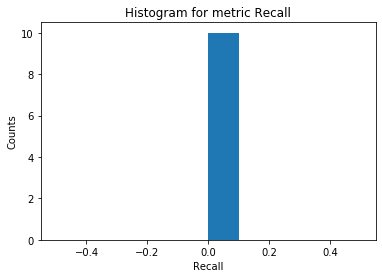

Mean of Recall: 0.0
Variance of Recall: 0.0
Standard Deviation of Recall: 0.0


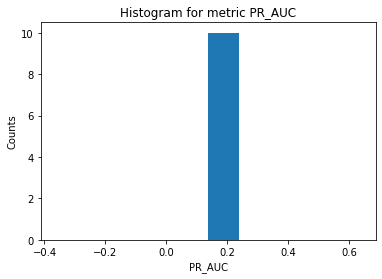

Mean of PR_AUC: 0.13796296296296298
Variance of PR_AUC: 7.703719777548943e-34
Standard Deviation of PR_AUC: 2.7755575615628914e-17


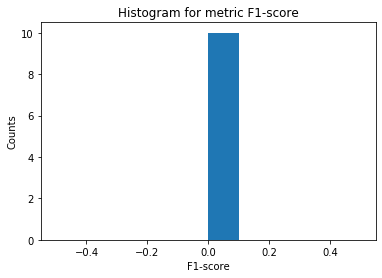

Mean of F1-score: 0.0
Variance of F1-score: 0.0
Standard Deviation of F1-score: 0.0


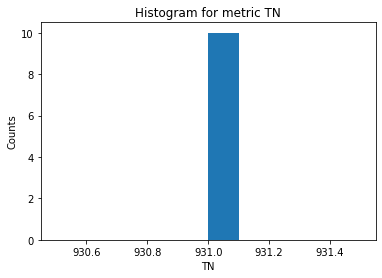

Mean of TN: 931.0
Variance of TN: 0.0
Standard Deviation of TN: 0.0


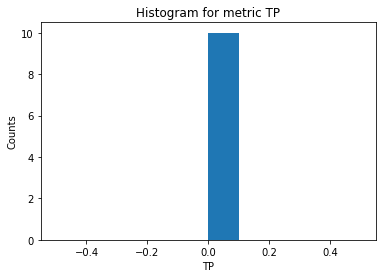

Mean of TP: 0.0
Variance of TP: 0.0
Standard Deviation of TP: 0.0


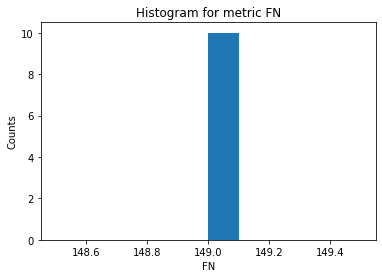

Mean of FN: 149.0
Variance of FN: 0.0
Standard Deviation of FN: 0.0


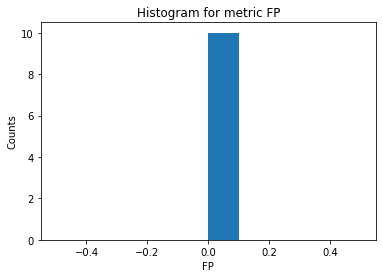

Mean of FP: 0.0
Variance of FP: 0.0
Standard Deviation of FP: 0.0


In [38]:
display_results(baseline_cv_results, 10)

### Decision Tree Model

The decision tree was chosen as a model to use because it is part of a class of ML models that tend to be more interpretable to humans than others. The decision tree is a model that classifies samples using a set of decision rules that act upon the features of each sample. This set of rules can be organized into a binary tree of decision rules where each sample traces a path from root to leaf where it is assigned a probability for classification. This characteristic of decision trees makes them much easier to interpret than other machine learning models.

In [1]:
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Random Seed
seed = None
# Number of folds to use in k-fold cross-validation
k_folds = 10

In [2]:
with open('dataset.pickle', 'rb') as f:
    X, y, _, _ = pickle.load(f)

In [3]:
def display_results(results, hist_bins=None):
    
    metric_names = [name for name in results.keys() if 'test' in name]
    
    for metric_name in metric_names:
        
        metric_values = results[metric_name]
        name = metric_name.split('test_', 1)[1]
        
        fig, ax = plt.subplots()
        ax.hist(metric_values, bins=hist_bins)
        ax.set_ylabel('Counts')
        ax.set_xlabel(name)
        ax.set_title('Histogram for metric {}'.format(name))
        plt.show()
        
        print('Mean of {}: {}'.format(name, metric_values.mean()))
        print('Variance of {}: {}'.format(name, metric_values.var()))
        print('Standard Deviation of {}: {}'.format(name, metric_values.std()))
        
    return None

Splitting train dataset into train and test datasets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=seed)
print('Train dataset size: {}'.format(len(y_train)))
print('Test dataset size: {}'.format(len(y_test)))

Train dataset size: 10800
Test dataset size: 1200


Building model. 

In [5]:
# Defining Hyperparameters
hyperparameters = {'random_state': seed}

# Defining Metrics
def tn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[1, 1]

metrics = {'Accuracy': 'accuracy', 'Precision': 'precision', 'Recall': 'recall',
           'PR_AUC': 'average_precision', 'F1-score': 'f1',
           'TN': sklearn.metrics.make_scorer(tn), 'TP': sklearn.metrics.make_scorer(tp),
           'FN': sklearn.metrics.make_scorer(fn), 'FP': sklearn.metrics.make_scorer(fp)}

In [6]:
tree_model = DecisionTreeClassifier(**hyperparameters)

Training and evaluating model, estimating metrics using k-fold cross-validation.

In [7]:
tree_cv_results = cross_validate(tree_model, X_train, y_train, cv=k_folds, scoring=metrics)

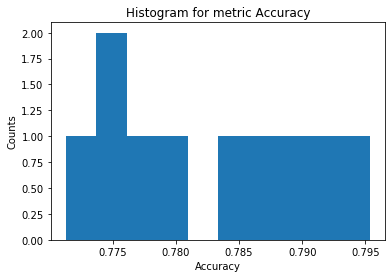

Mean of Accuracy: 0.7826851851851852
Variance of Accuracy: 6.156550068587112e-05
Standard Deviation of Accuracy: 0.007846368630511259


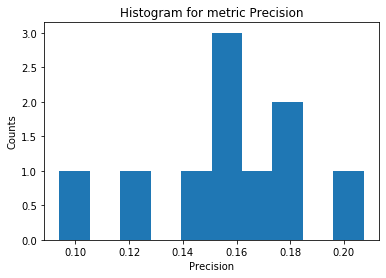

Mean of Precision: 0.15682908498021764
Variance of Precision: 0.0009124900022346351
Standard Deviation of Precision: 0.03020744944934337


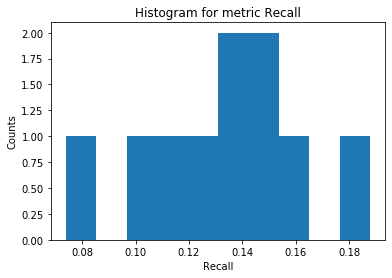

Mean of Recall: 0.13221476510067115
Variance of Recall: 0.0008832935453357959
Standard Deviation of Recall: 0.029720254799308097


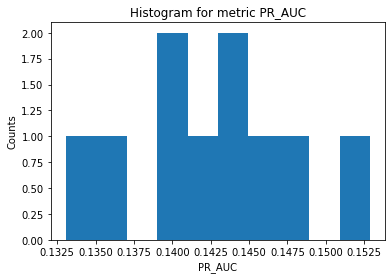

Mean of PR_AUC: 0.14268429716397588
Variance of PR_AUC: 2.902133273155647e-05
Standard Deviation of PR_AUC: 0.005387145137413366


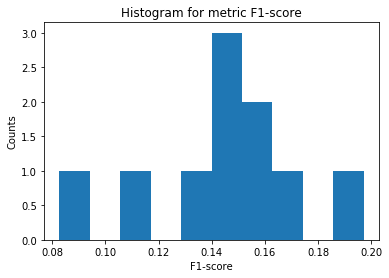

Mean of F1-score: 0.14325095878101174
Variance of F1-score: 0.0008756213303679709
Standard Deviation of F1-score: 0.029590899451824217


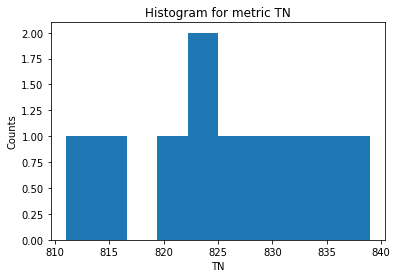

Mean of TN: 825.6
Variance of TN: 64.43999999999998
Standard Deviation of TN: 8.02745289615579


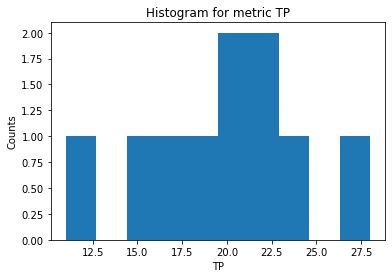

Mean of TP: 19.7
Variance of TP: 19.61
Standard Deviation of TP: 4.428317965096905


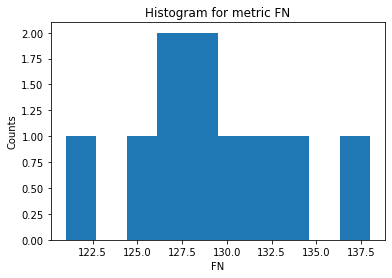

Mean of FN: 129.3
Variance of FN: 19.609999999999996
Standard Deviation of FN: 4.428317965096905


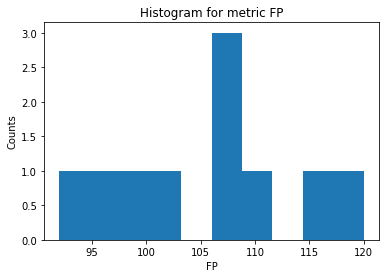

Mean of FP: 105.4
Variance of FP: 64.43999999999998
Standard Deviation of FP: 8.02745289615579


In [8]:
display_results(tree_cv_results, 10)

From the above results it appears our basic decision tree model is performing better than the baseline on all metrics except accuracy, this is a good sign. From our exploratory data analysis we know our dataset is unbalanced with a minority class of adopted (represented as 1). We also are more interested in understanding what factors lead to a user being labeled as adopted as opposed to not adopted. Therefore accuracy is not the best metric to judge our model, and we should be focusing on maximizing precision, recall, F1-score, or PR_AUC (area under precision recall curve). Since PR_AUC can be interpretted as the precision averaged over all values of recall, and all values of recall can be spanned by varying the classification threshold, PR_AUC gives a good summarization of the models precision and recall capabilities irrespective of the models current classification threshold. Therefore the metric we will choose to maximize is PR_AUC.

#### Hyperparameter Tuning 

In [9]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Random Seed
seed = None
# Number of folds to use in k-fold cross-validation
k_folds = 10

In [10]:
with open('dataset.pickle', 'rb') as f:
    X, y, _, _ = pickle.load(f)

Splitting train dataset into train and test datasets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=seed)
print('Train dataset size: {}'.format(len(y_train)))
print('Test dataset size: {}'.format(len(y_test)))

Train dataset size: 10800
Test dataset size: 1200


Building grid search model.

In [12]:
param_grid = {'criterion': ['entropy'], 'max_depth': [i for i in range(2, 10)] + [None], 'splitter': ['best'], 
              'min_samples_split': [i for i in range(2, 4)], 'min_samples_leaf': [i for i in range(1, 4)],
              'max_features': ['sqrt', 'log2', None], 'class_weight': ['balanced', {0: (1/0.99), 1: (1/0.01)}, None], 'random_state': [seed]}
metric = 'average_precision'

In [13]:
gs_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid,
                        scoring=metric, n_jobs=-1, cv=k_folds, refit=False, verbose=2)

Training and evaluating grid search model using k-fold cross validation.

In [14]:
gs_model = gs_model.fit(X_train, y_train)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 1277 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2537 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4102 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed:  3.1min finished


In [15]:
print('Best PR_AUC: {}'.format(gs_model.best_score_))
print('Best Hyperparameters: {}'.format(gs_model.best_params_))

Best PR_AUC: 0.18152517981109234
Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'random_state': None, 'splitter': 'best'}


Writing tuned hyperparameters to disk.

In [16]:
with open('hyperparameters_tree.pickle', 'wb') as f:
    pickle.dump(gs_model.best_params_, f)

#### Evaluating Model

In [17]:
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Random Seed
seed = None
# Number of folds to use in k-fold cross-validation
k_folds = 10

In [18]:
with open('dataset.pickle', 'rb') as f:
    X, y, _, _ = pickle.load(f)

In [19]:
def display_results(results, hist_bins=None):
    
    metric_names = [name for name in results.keys() if 'test' in name]
    
    for metric_name in metric_names:
        
        metric_values = results[metric_name]
        name = metric_name.split('test_', 1)[1]
        
        fig, ax = plt.subplots()
        ax.hist(metric_values, bins=hist_bins)
        ax.set_ylabel('Counts')
        ax.set_xlabel(name)
        ax.set_title('Histogram for metric {}'.format(name))
        plt.show()
        
        print('Mean of {}: {}'.format(name, metric_values.mean()))
        print('Variance of {}: {}'.format(name, metric_values.var()))
        print('Standard Deviation of {}: {}'.format(name, metric_values.std()))
        
    return None

Splitting train dataset into train and test datasets.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=seed)
print('Train dataset size: {}'.format(len(y_train)))
print('Test dataset size: {}'.format(len(y_test)))

Train dataset size: 10800
Test dataset size: 1200


Building model. 

In [21]:
# Defining Hyperparameters
with open('hyperparameters_tree.pickle', 'rb') as f:
    hyperparameters = pickle.load(f)

# Defining Metrics
def tn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[1, 1]

metrics = {'Accuracy': 'accuracy', 'Precision': 'precision', 'Recall': 'recall',
           'PR_AUC': 'average_precision', 'F1-score': 'f1',
           'TN': sklearn.metrics.make_scorer(tn), 'TP': sklearn.metrics.make_scorer(tp),
           'FN': sklearn.metrics.make_scorer(fn), 'FP': sklearn.metrics.make_scorer(fp)}

In [22]:
tree_model = DecisionTreeClassifier(**hyperparameters)

Training and evaluating model, estimating metrics using k-fold cross-validation.

In [23]:
tree_cv_results = cross_validate(tree_model, X_train, y_train, cv=k_folds, scoring=metrics)

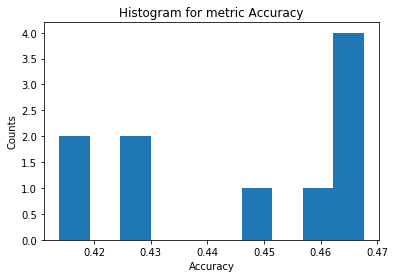

Mean of Accuracy: 0.4458333333333333
Variance of Accuracy: 0.0004096793552812074
Standard Deviation of Accuracy: 0.020240537425701113


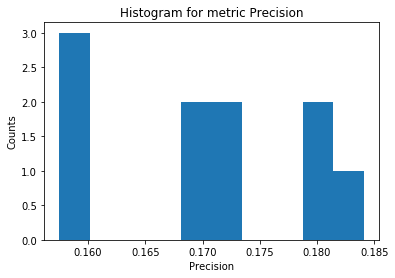

Mean of Precision: 0.17047049885126336
Variance of Precision: 7.415473576467168e-05
Standard Deviation of Precision: 0.008611314404007768


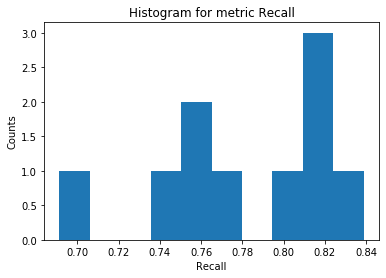

Mean of Recall: 0.7798657718120805
Variance of Recall: 0.0018269447322192696
Standard Deviation of Recall: 0.042742774035142705


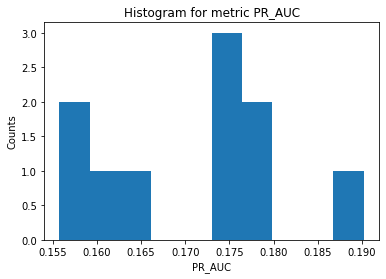

Mean of PR_AUC: 0.17078698939733167
Variance of PR_AUC: 0.00011193922037099152
Standard Deviation of PR_AUC: 0.010580133287014465


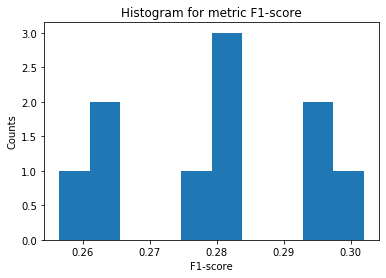

Mean of F1-score: 0.2797322328324931
Variance of F1-score: 0.0001926180047591883
Standard Deviation of F1-score: 0.013878688870321588


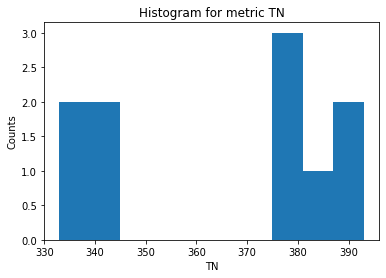

Mean of TN: 365.3
Variance of TN: 493.2099999999999
Standard Deviation of TN: 22.208331769856102


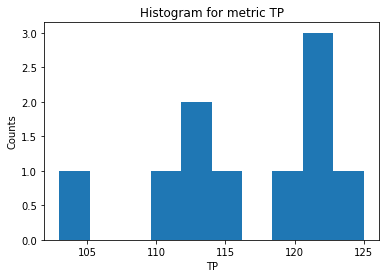

Mean of TP: 116.2
Variance of TP: 40.559999999999995
Standard Deviation of TP: 6.368673331236263


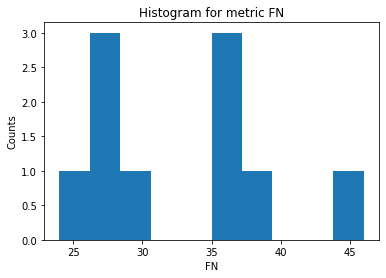

Mean of FN: 32.8
Variance of FN: 40.559999999999995
Standard Deviation of FN: 6.368673331236263


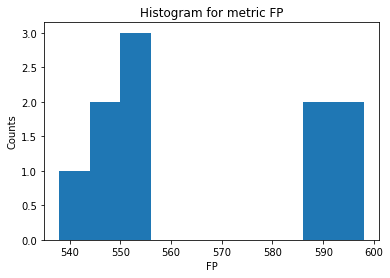

Mean of FP: 565.7
Variance of FP: 493.2099999999999
Standard Deviation of FP: 22.208331769856102


In [24]:
display_results(tree_cv_results, 10)

### Conclusions

Initially the goal was to identify which factors predict future user adoption. This implies that prediction of the positive class is more valuable which means we should be focusing on the PR_AUC, precision, recall, and F1-score metrics of the models we are considering. It is clear from the above analysis that the model that performs best on our metrics is the best performing Decision Tree model, thus we will k-fold evaluate this model on our test dataset to get a better gauge on this model's true performance.

#### Evaluating Model

In [25]:
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Random Seed
seed = None
# Number of folds to use in k-fold cross-validation
k_folds = 10

In [26]:
with open('dataset.pickle', 'rb') as f:
    X, y, _, _ = pickle.load(f)

In [27]:
def display_results(results, hist_bins=None):
    
    metric_names = [name for name in results.keys() if 'test' in name]
    
    for metric_name in metric_names:
        
        metric_values = results[metric_name]
        name = metric_name.split('test_', 1)[1]
        
        fig, ax = plt.subplots()
        ax.hist(metric_values, bins=hist_bins)
        ax.set_ylabel('Counts')
        ax.set_xlabel(name)
        ax.set_title('Histogram for metric {}'.format(name))
        plt.show()
        
        print('Mean of {}: {}'.format(name, metric_values.mean()))
        print('Variance of {}: {}'.format(name, metric_values.var()))
        print('Standard Deviation of {}: {}'.format(name, metric_values.std()))
        
    return None

Building model. 

In [28]:
# Defining Hyperparameters
with open('hyperparameters_tree.pickle', 'rb') as f:
    hyperparameters = pickle.load(f)

# Defining Metrics
def tn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[1, 1]

metrics = {'Accuracy': 'accuracy', 'Precision': 'precision', 'Recall': 'recall',
           'PR_AUC': 'average_precision', 'F1-score': 'f1',
           'TN': sklearn.metrics.make_scorer(tn), 'TP': sklearn.metrics.make_scorer(tp),
           'FN': sklearn.metrics.make_scorer(fn), 'FP': sklearn.metrics.make_scorer(fp)}

In [29]:
tree_model = DecisionTreeClassifier(**hyperparameters)

Training and evaluating model using k-fold cross-validation.

In [30]:
tree_cv_results = cross_validate(tree_model, X, y, cv=k_folds, scoring=metrics)

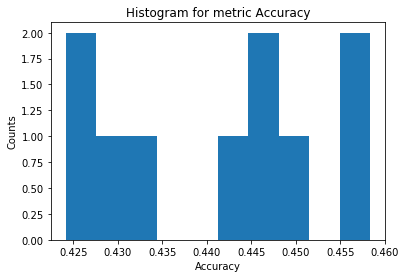

Mean of Accuracy: 0.4409166666666667
Variance of Accuracy: 0.00014117361111111096
Standard Deviation of Accuracy: 0.011881650184680197


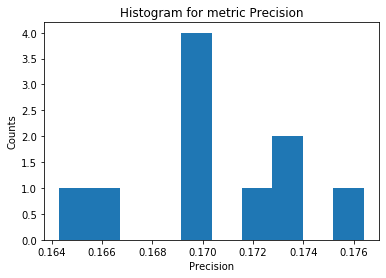

Mean of Precision: 0.1705722969667579
Variance of Precision: 1.0703537735130647e-05
Standard Deviation of Precision: 0.0032716261606624076


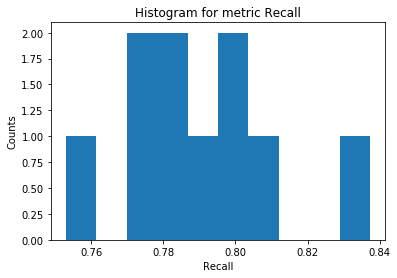

Mean of Recall: 0.7898539612997444
Variance of Recall: 0.000471046374751886
Standard Deviation of Recall: 0.021703602805798996


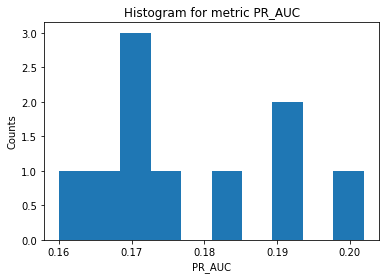

Mean of PR_AUC: 0.17838774098020846
Variance of PR_AUC: 0.00015196193910271138
Standard Deviation of PR_AUC: 0.012327284336086005


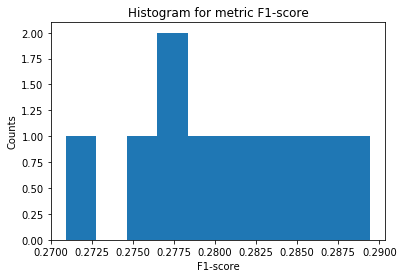

Mean of F1-score: 0.2805358594150145
Variance of F1-score: 2.8341502311213788e-05
Standard Deviation of F1-score: 0.005323673760779655


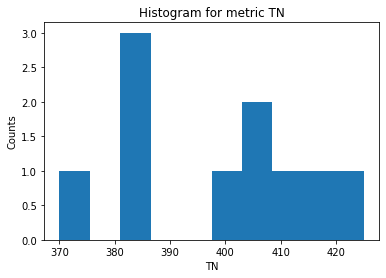

Mean of TN: 398.3
Variance of TN: 261.81
Standard Deviation of TN: 16.18054387219416


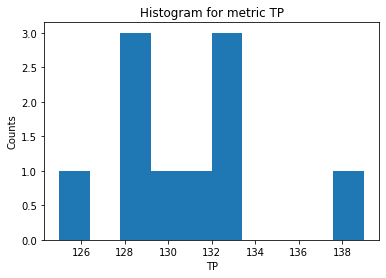

Mean of TP: 130.8
Variance of TP: 13.159999999999997
Standard Deviation of TP: 3.6276714294434105


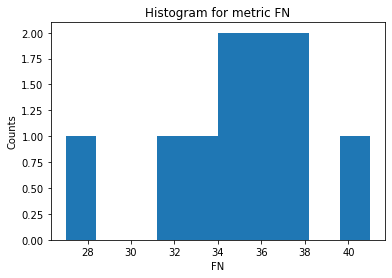

Mean of FN: 34.8
Variance of FN: 12.959999999999997
Standard Deviation of FN: 3.5999999999999996


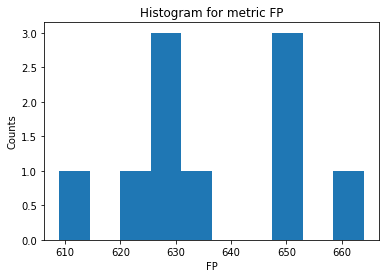

Mean of FP: 636.1
Variance of FP: 253.68999999999997
Standard Deviation of FP: 15.927648916271352


In [31]:
display_results(tree_cv_results, 10)

## Analyzing Model

In order to gain a better understand of what factors influence future user adoption trends we have to gain a better understanding of how our selected model is making decisions. To do so we will plot our models graph which in the case of a decision tree, are the selection rules it uses to make a decision.

In [32]:
import pickle
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Random Seed
seed = None
# Number of folds to use in k-fold cross-validation
k_folds = 10

In [33]:
with open('dataset.pickle', 'rb') as f:
    X, y, feature_names, label_name = pickle.load(f)

Building model.

In [34]:
# Defining Hyperparameters
with open('hyperparameters_tree.pickle', 'rb') as f:
    hyperparameters = pickle.load(f)

In [35]:
tree_model = DecisionTreeClassifier(**hyperparameters)

Training model on full dataset.

In [36]:
tree_model = tree_model.fit(X, y)

Plotting the Decision Tree.

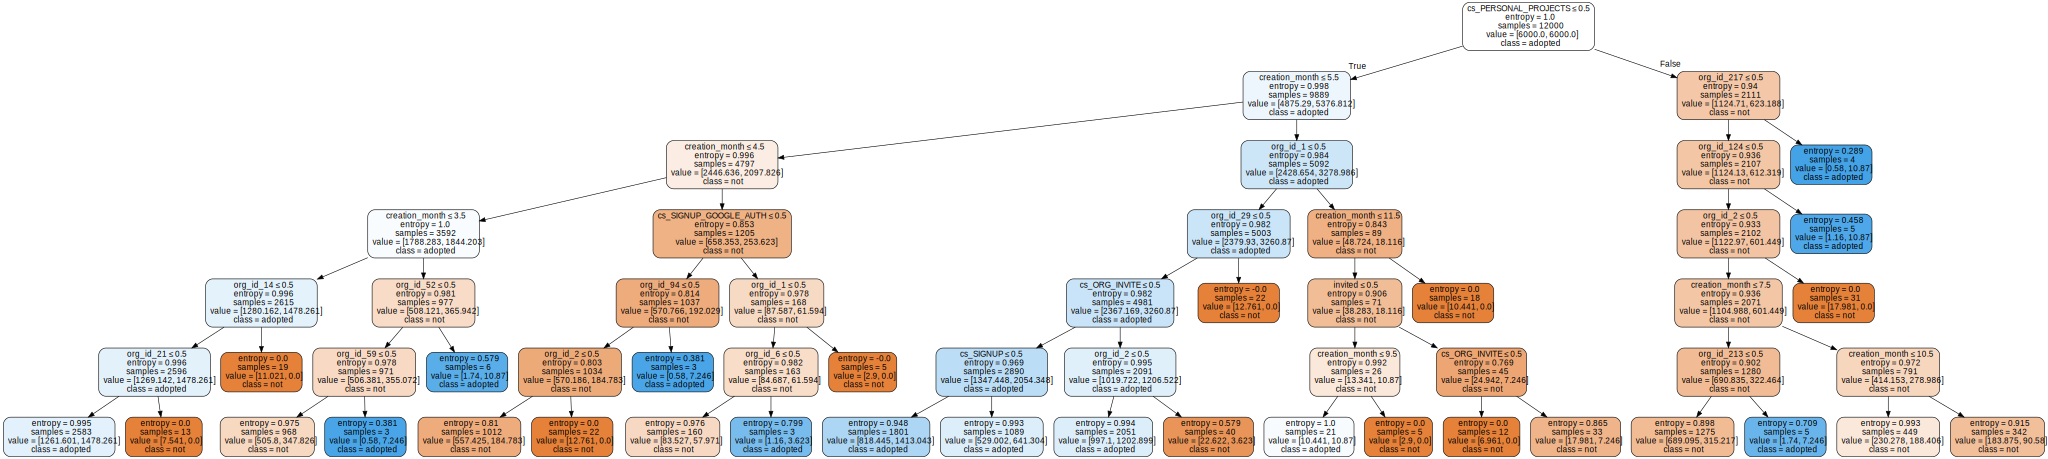

In [37]:
dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names, class_names=['not', 'adopted'],
                                filled=True, rounded=True, special_characters=True) 
graphviz.Source(dot_data)

### Conclusions

From the above graph of our tree, it appears that the two most import variables that effect adopted user status are if the user was invited to join because of a personal project, and the month they created their account. The models recall on average is about 0.78, with an F1-score of 0.28, precision score of 0.17, and an area under the precison recall curve of about 0.17. Although this model does perform better than our baseline model, it can still be much better. Some future suggestions for improvement include: trying out a logistic regression model, further hyperparameter tuning, or trying out a model with less interpretability such as a neural network or random forest.